In [4]:
#Data analysis and manipulation tools:
import pandas as pd
import numpy as np

#Visualization tools:
import matplotlib.pyplot as plt
import seaborn as sns

#PCA and machine learning tools:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Python:
import warnings
warnings.simplefilter('ignore')

In [9]:
#Loadng the data

df = pd.read_csv('ECommerce_consumer behaviour.csv')
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [11]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

### Conclusion:

### We have 12,434 null values in days since prior order column which is 6.15% of the dataset.

In [12]:
df['days_since_prior_order'].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [13]:
#Checking null column's mean & median

df['days_since_prior_order'].mean(), df['days_since_prior_order'].median()

(11.386034628229083, 8.0)

In [14]:
filter_ = df['days_since_prior_order'].where(df['days_since_prior_order']==8.).sum()
filter_

949776.0

### We have 949,776 records with 8.0 value, which is 47% of the total records, which increases the outliers and biases if used to fill null values.

In [15]:
filter_ = df['days_since_prior_order'].where(df['days_since_prior_order']==11.).sum()
filter_

566236.0

### Same with mean = 11, we have 566,236 rows with this value, which is 28% of the dataset. So we'll fill nans with 0 instead.

In [16]:
df.fillna(0, inplace=True)

### Checking our changes are saved

In [17]:
df['days_since_prior_order'].unique()

array([ 0.,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18., 19., 17., 22.,
       26., 24., 16., 23., 27.])

In [18]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [19]:
df['product_name'].value_counts()

fresh fruits                  226039
fresh vegetables              212611
packaged vegetables fruits    109596
yogurt                         90751
packaged cheese                61502
                               ...  
kitchen supplies                 561
baby bath body care              515
baby accessories                 504
beauty                           387
frozen juice                     279
Name: product_name, Length: 134, dtype: int64

In [20]:
df['product_id'].value_counts()

24     226039
83     212611
123    109596
120     90751
21      61502
        ...  
10        561
102       515
82        504
132       387
113       279
Name: product_id, Length: 134, dtype: int64

### Conclusion:
### Product name & ID are equivalent, hence, we can later drop product name

In [40]:
df['order_dow'].unique()

array([2, 3, 0, 1, 6, 5, 4])

In [42]:
days = {0.0:'Mon',1.0:'Tues',2.0:'Weds',3.0:'Thurs',4.0:'Fri',5.0:'Sat',6.0:'Sun'}
df["day_of_order"] = df["order_dow"].apply(lambda x : days[x])

In [44]:
df['day_of_order'].unique()

array(['Weds', 'Thurs', 'Mon', 'Tues', 'Sun', 'Sat', 'Fri'], dtype=object)

## Checking how many  departments exits

In [22]:
print(list(df['department'].unique()), '\n')
print('Number of departments = ', df['department'].nunique())

['pantry', 'dairy eggs', 'produce', 'canned goods', 'meat seafood', 'frozen', 'bakery', 'beverages', 'breakfast', 'snacks', 'international', 'household', 'personal care', 'babies', 'deli', 'dry goods pasta', 'missing', 'alcohol', 'pets', 'bulk', 'other'] 

Number of departments =  21


## Checking how many  products exits

In [23]:
print('Number of unique products = ', df['product_name'].nunique())

Number of unique products =  134


## Checking how many users exits

In [24]:
print('Number of users = ', df['user_id'].nunique()) 

Number of users =  105273


## What is the average number of items placed in the basket?


In [25]:
print(int(df['add_to_cart_order'].mean()), 'Items')


8 Items


## How long are customers waiting before ordering again on average?


In [26]:
print(int(df['days_since_prior_order'].mean()), 'Days')

10 Days


## Visualizing the Order Day Of Week Column:

In [90]:
def make_pie(column):
    values = df[column].value_counts()
    colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
    plt.pie(values.values,labels=['Mon', 'Tue', 'Wed', 'Thur', 'Fri','Sat','Sun']
            ,colors = colors, radius=1.5,autopct='%1.2f%%')

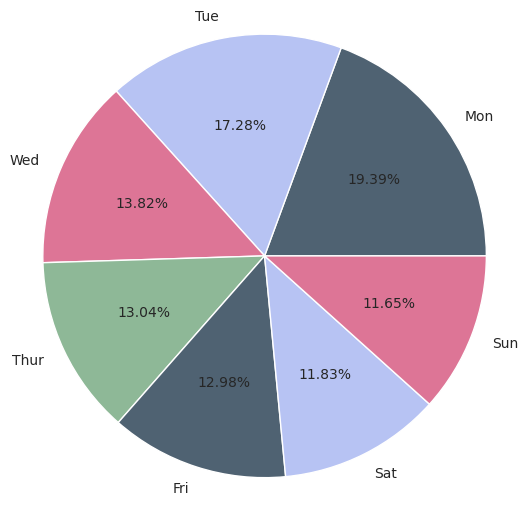

In [91]:
make_pie('order_dow')


## What time of day is busiest?

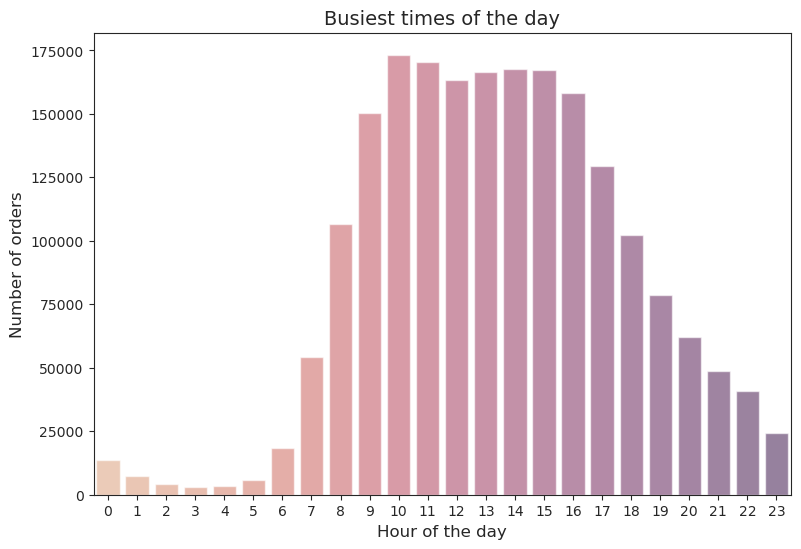

In [27]:
df['order_hour_of_day'].value_counts()

plt.figure(figsize = (9,6))
sns.set_style("ticks")
sns.countplot(data=df, x=df['order_hour_of_day'], palette = 'flare', alpha=0.6)
plt.title("Busiest times of the day", fontsize=14)
plt.xlabel("Hour of the day", fontsize=12)
plt.ylabel("Number of orders", fontsize=12)
plt.show()

## People are most likely to order from 8 AM to 10 PM

# Which products are reordered most?

In [28]:
product_reordered_df = df.groupby('department')['reordered'].sum().reset_index().sort_values(by='reordered', ascending=False)
product_reordered_df.head()

,department,reordered
19,produce,382425
7,dairy eggs,225798
3,beverages,110117
20,snacks,103784
10,frozen,75135


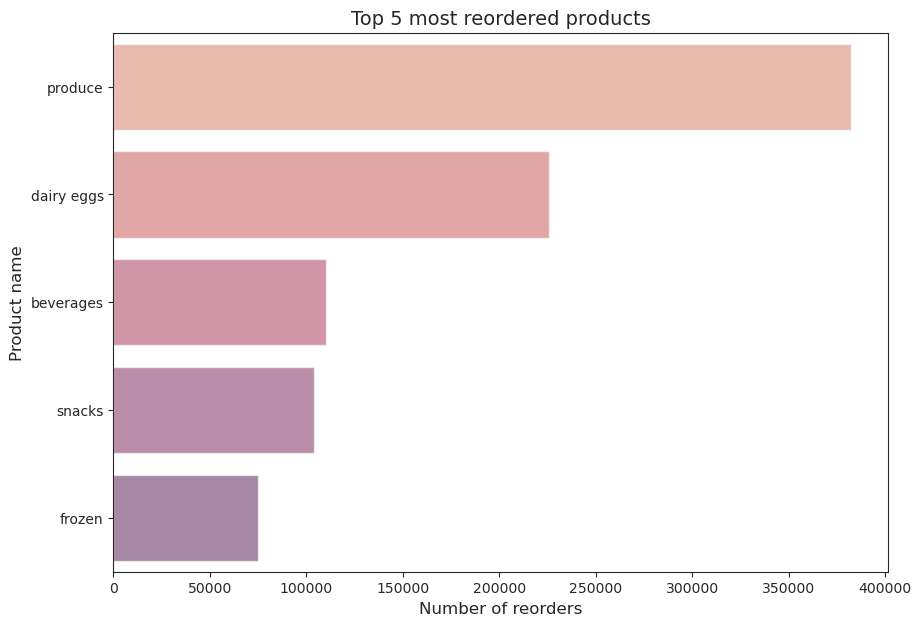

In [29]:
plt.figure(figsize = (10,7))
sns.set_style("ticks")
sns.barplot(data=product_reordered_df.head(5), x="reordered", y="department", palette = 'flare', alpha=0.6)
plt.title("Top 5 most reordered products", fontsize=14)
plt.xlabel("Number of reorders", fontsize=12)
plt.ylabel("Product name", fontsize=12)
plt.show()

### Conclusion:

### From the above table we can clearly observe that produce, dairy products, beverages and snacks are the top categories the customers are most interested in purchasing

## Most popular products:

In [30]:
products = df['product_name'].value_counts()

products_df = pd.DataFrame(products).reset_index()

products_df.columns = ['Product', 'Order_Count']

top_products = products_df.sort_values(by='Order_Count', ascending=False).head()
products_df

,Product,Order_Count
0,fresh fruits,226039
1,fresh vegetables,212611
2,packaged vegetables fruits,109596
3,yogurt,90751
4,packaged cheese,61502
...,...,...
129,kitchen supplies,561
130,baby bath body care,515
131,baby accessories,504
132,beauty,387


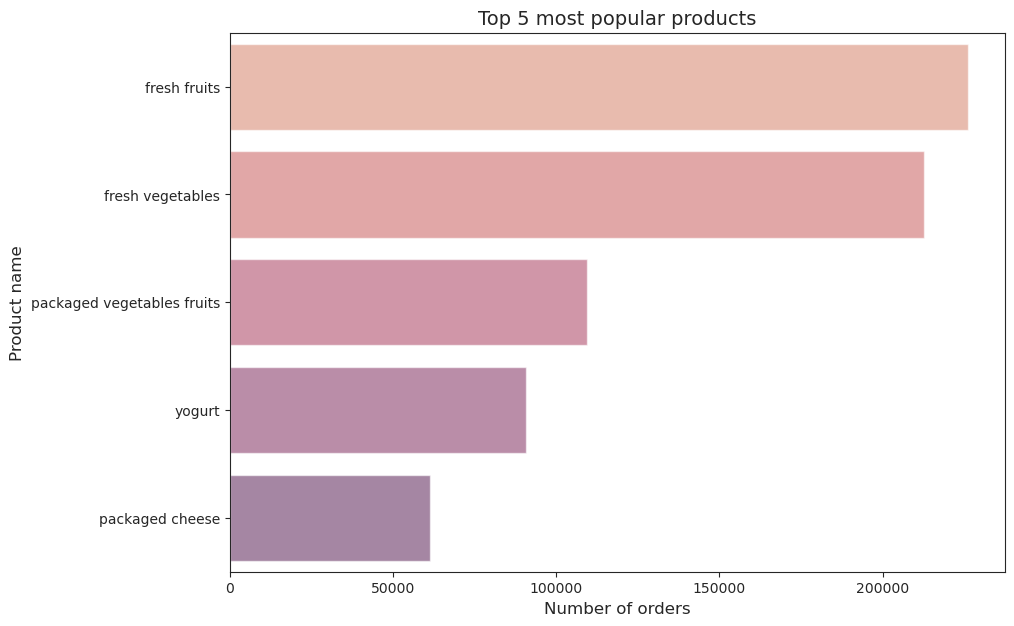

In [31]:
plt.figure(figsize = (10,7))
sns.set_style("ticks")
sns.barplot(data=top_products, x="Order_Count", y="Product", palette = 'flare', alpha=0.6)
plt.title("Top 5 most popular products", fontsize=14)
plt.xlabel("Number of orders", fontsize=12)
plt.ylabel("Product name", fontsize=12)
plt.show()


#### PCA:

Principal Component analysis - PCA algorithm,is a dimensionality reduction technique which reduces the dimensions of a dataset by projecting a d-dimensional features space onto a k-dimensional subspace, where k is less than d.

The PCA creates new features from the existing ones by projecting all dependent features onto a new feature which is independent. 

The resulting features are guaranteed to be uncorrelated.

In [32]:
# Remove unwanted columns
df = df.drop(['order_id', 'user_id', 'order_number', 'department_id', 'product_id'], axis = 1)


In [33]:
df.head()

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,department,product_name
0,2,18,0.0,1,0,pantry,baking ingredients
1,2,18,0.0,2,0,dairy eggs,soy lactosefree
2,2,18,0.0,3,0,dairy eggs,butter
3,2,18,0.0,4,0,produce,fresh vegetables
4,2,18,0.0,5,0,produce,fresh vegetables


In [34]:
# Scaling the data

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df.iloc[:, :-2])



In [35]:
pca_obj = PCA(n_components=3)
pca = pca_obj.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca,
                        columns=['PC1', 'PC2', 'PC3'])
pca_df.head()

,PC1,PC2,PC3
0,-0.278378,-0.999085,-0.730310
1,-0.184500,-1.003332,-0.703474
2,-0.090622,-1.007578,-0.676637
3,0.003255,-1.011824,-0.649800
4,0.097133,-1.016071,-0.622963


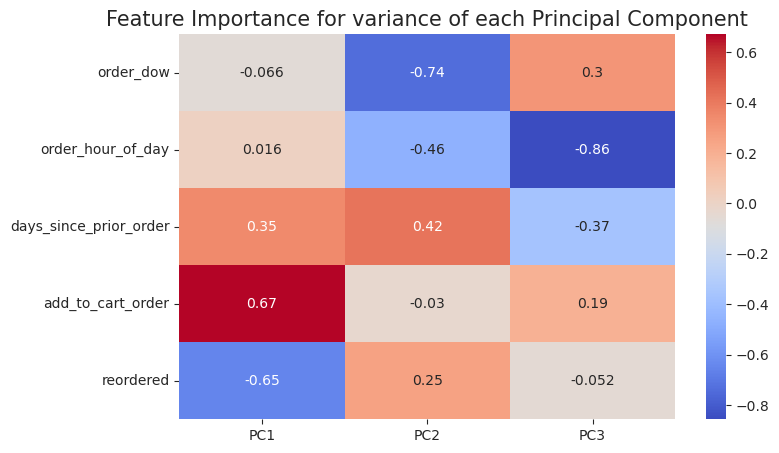

In [36]:
figure = plt.figure(figsize=(8, 5))

sns.heatmap(pd.DataFrame(pca_obj.components_).transpose(),
            annot=True,
            xticklabels=['PC1', 'PC2', 'PC3'],
            yticklabels=df.iloc[:,:-2].columns,
            cmap='coolwarm')

plt.title('Feature Importance for variance of each Principal Component', fontsize=15)
plt.show()

* PC1 are mostly customers that reorder and order a large number of items at each order
* PC2 are influenced mostly by the day of the week
* PC3 are influenced by the hour of the day